In [ ]:
##Download Pytorch 2.0.0 & cuda version 11.8##
print("Torch version:",torch.__version__)

print("Is CUDA enabled?",torch.cuda.is_available())

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
#from diffusers import LMSDiscreteScheduler
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, safety_checker=None, torch_dtype=torch.float16)
#lms = LMSDiscreteScheduler.from_config(pip.scheduler.config)
#pipe.scheduler = lms
pipe = pipe.to("cuda")

In [24]:
prompt = " (Big scenic of Future city:1.2), (Cyberpunk in style:1.2), (cinnamic footage:1.1), Masterpiece, best quality, ultra highres, 8K resolution, ultra realistic, ultra-detailed, clear and sharp focus, good contrast, raw photo, even studio lighting"
images = pipe(prompt,
              num_images_per_prompt=2,
              height=512,
              width=512,
              num_inference_steps=50,
              negative_prompt="bad anatomy, bad proportions, blurry, cloned face, cropped, watermark, deformed, dehydrated, disfigured, duplicate, error, extra arms, extra fingers, extra legs, extra limbs, fused fingers, gross proportions, jpeg artifacts, long neck, low quality, low-res, malformed limbs, missing arms, missing legs, morbid, mutated hands, mutation, mutilated, out of frame, poorly drawn face, poorly drawn hands, signature, text, too many fingers, ugly, username, worst quality",
            ).images

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['repeated for tiling, garment repeated pattern']


  0%|          | 0/50 [00:00<?, ?it/s]

2


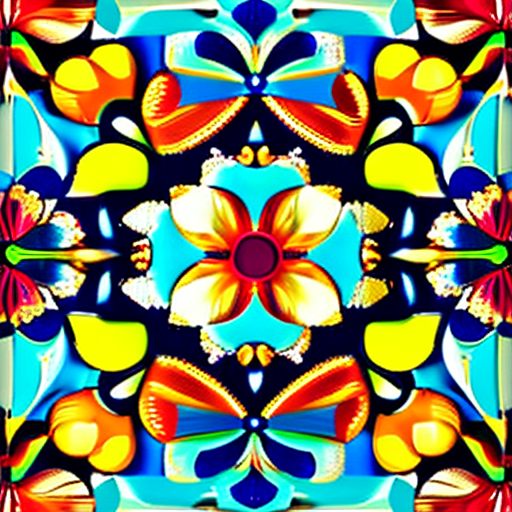

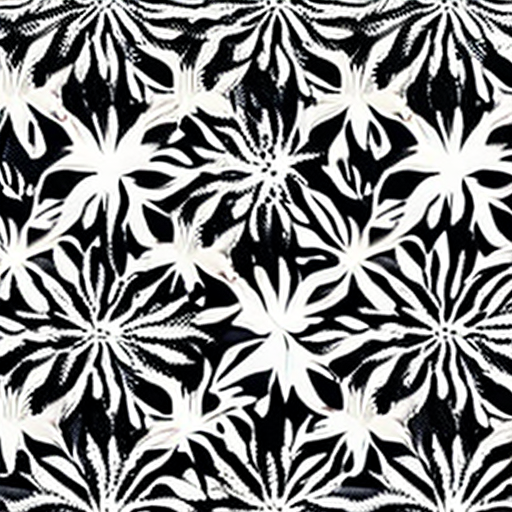

In [25]:
import PIL
from PIL import Image

print(len(images))

for i in images:
    display(i)

In [26]:
img = images[1]
img.save("C:/Users/benle/Desktop/Pattern editing/"+"512mix.png")

In [ ]:
###### Standard SD Upscaler x4 ######

import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

# Upsacle the image with path
#response = "C:/Users/benle/Desktop/Pattern editing/pixel_art.png"
response ="C:/Users/benle/Downloads/ALP_check_16_.png"
low_res_img = Image.open(response).convert("RGB")
low_res_img = low_res_img.resize((512, 512))

prompt = "checked pattern, good contrast, perfect straight line, solid coloured line, good ratio"
negativeprompt = "Watermark, word, dotted line, mixed colour"

upscaled_image = pipeline(prompt=prompt,negative_prompt=negativeprompt, image=low_res_img).images[0]
upscaled_image.save("C:/Users/benle/Desktop/Pattern editing/"+"ALP_check_16__2048.png")

In [ ]:
###############################################################################################################

In [ ]:
####### Upscaler model 2 #######
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline
import torch
from PIL import Image

device = "cuda"

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to(device)

upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained("stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16).to(device)


prompt = "checked pattern, good contrast"

# first upscale 2x
upscaled_images = upscaler(
    prompt=prompt,
    image=Image.open("C:/Users/benle/Downloads/image.png"),
    num_inference_steps=20,
    guidance_scale=0,
    output_type="pil"
).images
upscaled_images[0].save("C:/Users/benle/Desktop/Pattern editing/"+"image_1024.png")

# second upscale 2x (total 4x)
upscaled_images2 = upscaler(
    prompt=prompt,
    image=upscaled_images,
    num_inference_steps=20,
    guidance_scale=0,
).images
upscaled_images2[0].save("C:/Users/benle/Desktop/Pattern editing/"+"image_2048.png")


In [ ]:
##################### Image mixer #########################

In [1]:
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image
import torch
from torchvision import transforms

device = "cuda"
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  "lambdalabs/sd-image-variations-diffusers",
  revision="v2.0",
  )
sd_pipe = sd_pipe.to(device)

im = Image.open("C:/Users/benle/Desktop/Line Review images/"+"S2.png")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

out = sd_pipe(inp, guidance_scale=3)
out["images"][0].save("result.jpg")

unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0